<h2> Filter-Based Feature Selection

<h3> Database

In [24]:
import pandas as pd
import numpy as np
from sklearn import model_selection
import matplotlib.pyplot as plt

In [25]:
ds = pd.read_csv("drebin.csv", low_memory=False)

In [26]:
ds.head()


,SEND_SMS,READ_PHONE_STATE,GET_ACCOUNTS,RECEIVE_SMS,READ_SMS,USE_CREDENTIALS,MANAGE_ACCOUNTS,WRITE_SMS,READ_SYNC_SETTINGS,AUTHENTICATE_ACCOUNTS,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,1,1,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


<h2> Training Data

In [39]:
from itertools import count

def a (permission,class_id,ds):
    ds_class = ds[ds["class"] == class_id]
    return len(ds_class[permission][ds_class[permission] == 1])

def b (permission, class_id,ds):
    ds_class = ds[ds["class"] == class_id]
    return len(ds_class[permission][ds_class[permission] != 1])

def c (permission_id,class_id,ds):
    ds_class = ds[ds["class"] != class_id]
    return len(ds_class[permission_id][ds_class[permission_id] == 1])

def d (permission_id,class_id,ds):
    ds_class = ds[ds["class"] != class_id]
    return len(ds_class[permission_id][ds_class[permission_id] != 1])

def N ():
    return ds.shape[0]

def n1(class_id, ds):
    ds_class = ds[ds['class'] == class_id]
    return len(ds_class)

def n2(class_id, ds):
    ds_class = ds[ds['class'] != class_id]
    return len(ds_class)

def d1(permission, ds):
    ds_permission = ds[ds[permission] == 1]
    return len(ds_permission)

def d2(permission, ds):
    ds_permission = ds[ds[permission] != 1]
    return len(ds_permission)

best_features = []

<h3> Odds ratio

In [31]:
def od(permission_id,class_id,ds):
    return (a(permission_id,class_id,ds) * d(permission_id,class_id,ds)) / (b(permission_id,class_id,ds) * c(permission_id,class_id,ds))

#use this to get the list of permissions and put in a list the 10 most important
def get_od_list(class_id, ds):
    od_list = []
    for permission in ds.columns[1:-1]:
        od_list.append([permission, od(permission, class_id, ds)])
    return od_list

list = get_od_list(1,ds)
list.sort(key=lambda x: x[1], reverse=True)
#aappend in best features the 10 most important if not already in
for i in range(10):
    if list[i][0] not in best_features:
        best_features.append(list[i][0])
print(best_features)


['READ_PHONE_STATE', 'RECEIVE_SMS', 'READ_SMS', 'INSTALL_PACKAGES', 'WRITE_APN_SETTINGS', 'DELETE_CACHE_FILES', 'WRITE_HISTORY_BOOKMARKS', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'WRITE_SMS', 'UPDATE_DEVICE_STATS']


<h3> Chi-Square

In [32]:
def chi_squared(permission_id,class_id,ds):
    aa = a(permission_id,class_id,ds)
    bb = b(permission_id,class_id,ds)
    cc = c(permission_id,class_id,ds)
    dd = d(permission_id,class_id,ds)
    return (((aa*dd - bb*cc)**2) / ((aa+bb)*(cc+dd)*(aa+cc)*(bb+dd)))
    

def get_chi_squared_list(class_id, ds):
    chi_squared_list = []
    for permission in ds.columns[1:-1]:
        chi_squared_list.append([permission, chi_squared(permission, class_id, ds)])
    return chi_squared_list

list = get_chi_squared_list(1,ds)
list.sort(key=lambda x: x[1], reverse=True)
for i in range(10):
    if list[i][0] not in best_features:
        best_features.append(list[i][0])
print(best_features)

['READ_PHONE_STATE', 'RECEIVE_SMS', 'READ_SMS', 'INSTALL_PACKAGES', 'WRITE_APN_SETTINGS', 'DELETE_CACHE_FILES', 'WRITE_HISTORY_BOOKMARKS', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'WRITE_SMS', 'UPDATE_DEVICE_STATS', 'GET_ACCOUNTS', 'MANAGE_ACCOUNTS', 'USE_CREDENTIALS', 'READ_HISTORY_BOOKMARKS']


<h3> Inverse Document Frequency

In [33]:
def idf(permission_id,class_id,ds):
    return np.log(N() / (a(permission_id,class_id,ds) + c(permission_id,class_id,ds)))

def get_idf_list(class_id, ds):
    idf_list = []
    for permission in ds.columns[1:-1]:
        idf_list.append([permission, idf(permission, class_id, ds)])
    return idf_list

list = get_idf_list(1,ds)
list.sort(key=lambda x: x[1], reverse=True)
for i in range(10):
    if list[i][0] not in best_features:
        best_features.append(list[i][0])
print(best_features)

['READ_PHONE_STATE', 'RECEIVE_SMS', 'READ_SMS', 'INSTALL_PACKAGES', 'WRITE_APN_SETTINGS', 'DELETE_CACHE_FILES', 'WRITE_HISTORY_BOOKMARKS', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'WRITE_SMS', 'UPDATE_DEVICE_STATS', 'GET_ACCOUNTS', 'MANAGE_ACCOUNTS', 'USE_CREDENTIALS', 'READ_HISTORY_BOOKMARKS', 'BIND_VPN_SERVICE', 'SET_ACTIVITY_WATCHER', 'BIND_TEXT_SERVICE', 'ADD_VOICEMAIL', 'INSTALL_LOCATION_PROVIDER', 'SET_PROCESS_LIMIT', 'MOUNT_FORMAT_FILESYSTEMS', 'BIND_ACCESSIBILITY_SERVICE', 'ACCESS_SURFACE_FLINGER', 'CLEAR_APP_USER_DATA']


<h3> Document Frequency Threshold

In [34]:
def dft(permission_id,class_id,ds):
    return a(permission_id,class_id,ds) + c(permission_id,class_id,ds)

def get_dft_list(class_id, ds):
    dft_list = []
    for permission in ds.columns[1:-1]:
        dft_list.append([permission, dft(permission, class_id, ds)])
    return dft_list

list = get_dft_list(1,ds)
list.sort(key=lambda x: x[1], reverse=True)
for i in range(10):
    if list[i][0] not in best_features:
        best_features.append(list[i][0])
print(best_features)

['READ_PHONE_STATE', 'RECEIVE_SMS', 'READ_SMS', 'INSTALL_PACKAGES', 'WRITE_APN_SETTINGS', 'DELETE_CACHE_FILES', 'WRITE_HISTORY_BOOKMARKS', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'WRITE_SMS', 'UPDATE_DEVICE_STATS', 'GET_ACCOUNTS', 'MANAGE_ACCOUNTS', 'USE_CREDENTIALS', 'READ_HISTORY_BOOKMARKS', 'BIND_VPN_SERVICE', 'SET_ACTIVITY_WATCHER', 'BIND_TEXT_SERVICE', 'ADD_VOICEMAIL', 'INSTALL_LOCATION_PROVIDER', 'SET_PROCESS_LIMIT', 'MOUNT_FORMAT_FILESYSTEMS', 'BIND_ACCESSIBILITY_SERVICE', 'ACCESS_SURFACE_FLINGER', 'CLEAR_APP_USER_DATA', 'INTERNET', 'ACCESS_NETWORK_STATE', 'WRITE_EXTERNAL_STORAGE', 'WAKE_LOCK', 'ACCESS_WIFI_STATE', 'RECEIVE_BOOT_COMPLETED', 'VIBRATE', 'ACCESS_FINE_LOCATION']


<h3> Acc and Acc2

In [38]:
def acc(permission_id,class_id,ds):
    return a(permission_id,class_id,ds) - c(permission_id,class_id,ds)

def acc2(permission_id,class_id,ds):
    return (a(permission_id,class_id,ds)/n1(class_id,ds)) - (c(permission_id,class_id,ds)/n2(class_id,ds))

def get_acc_list(class_id, ds):
    acc_list = []
    for permission in ds.columns[1:-1]:
        acc_list.append([permission, acc(permission, class_id, ds)])
    return acc_list

list = get_acc_list(1,ds)
list.sort(key=lambda x: x[1], reverse=True)
for i in range(10):
    if list[i][0] not in best_features:
        best_features.append(list[i][0])
print(best_features)

def get_acc2_list(class_id, ds):
    acc2_list = []
    for permission in ds.columns[1:-1]:
        acc2_list.append([permission, acc2(permission, class_id, ds)])
    return acc2_list

list = get_acc2_list(1,ds)
list.sort(key=lambda x: x[1], reverse=True)
for i in range(10):
    if list[i][0] not in best_features:
        best_features.append(list[i][0])
print(best_features)

['READ_PHONE_STATE', 'RECEIVE_SMS', 'READ_SMS', 'INSTALL_PACKAGES', 'WRITE_APN_SETTINGS', 'DELETE_CACHE_FILES', 'WRITE_HISTORY_BOOKMARKS', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'WRITE_SMS', 'UPDATE_DEVICE_STATS', 'GET_ACCOUNTS', 'MANAGE_ACCOUNTS', 'USE_CREDENTIALS', 'READ_HISTORY_BOOKMARKS', 'BIND_VPN_SERVICE', 'SET_ACTIVITY_WATCHER', 'BIND_TEXT_SERVICE', 'ADD_VOICEMAIL', 'INSTALL_LOCATION_PROVIDER', 'SET_PROCESS_LIMIT', 'MOUNT_FORMAT_FILESYSTEMS', 'BIND_ACCESSIBILITY_SERVICE', 'ACCESS_SURFACE_FLINGER', 'CLEAR_APP_USER_DATA', 'INTERNET', 'ACCESS_NETWORK_STATE', 'WRITE_EXTERNAL_STORAGE', 'WAKE_LOCK', 'ACCESS_WIFI_STATE', 'RECEIVE_BOOT_COMPLETED', 'VIBRATE', 'ACCESS_FINE_LOCATION', 'RESTART_PACKAGES']
['READ_PHONE_STATE', 'RECEIVE_SMS', 'READ_SMS', 'INSTALL_PACKAGES', 'WRITE_APN_SETTINGS', 'DELETE_CACHE_FILES', 'WRITE_HISTORY_BOOKMARKS', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'WRITE_SMS', 'UPDATE_DEVICE_STATS', 'GET_ACCOUNTS', 'MANAGE_ACCOUNTS', 'USE_CREDENTIALS', 'READ_HISTORY_BOOKMARKS', 'BIND_

<h3> M2 Method

In [41]:
def m2(permission_id,class_id,ds):
    return dft(permission_id,class_id,ds) * (np.absolute(a(permission_id,class_id,ds)/d1(permission_id,ds) - (b(permission_id,class_id,ds)/d2(permission_id,ds))))

def get_m2_list(class_id, ds):
    m2_list = []
    for permission in ds.columns[1:-1]:
        m2_list.append([permission, m2(permission, class_id, ds)])
    return m2_list

list = get_m2_list(1,ds)
list.sort(key=lambda x: x[1], reverse=True)
for i in range(10):
    if list[i][0] not in best_features:
        best_features.append(list[i][0])
print(best_features)

['READ_PHONE_STATE', 'INTERNET', 'GET_ACCOUNTS', 'RECEIVE_SMS', 'READ_SMS', 'ACCESS_NETWORK_STATE', 'WAKE_LOCK', 'RECEIVE_BOOT_COMPLETED', 'WRITE_SMS', 'MANAGE_ACCOUNTS']


<h3> Relevance frequency feature selection

In [43]:
def rffs(permission_id,class_id,ds):
    return dft(permission_id,class_id,ds) * np.absolute(np.log(2 + (a(permission_id,class_id,ds)/c(permission_id,class_id,ds))))

def get_rffs_list(class_id, ds):
    rffs_list = []
    for permission in ds.columns[1:-1]:
        rffs_list.append([permission, rffs(permission, class_id, ds)])
    return rffs_list

list = get_rffs_list(1,ds)
list.sort(key=lambda x: x[1], reverse=True)
for i in range(10):
    if list[i][0] not in best_features:
        best_features.append(list[i][0])
print(best_features)

['READ_PHONE_STATE', 'INTERNET', 'GET_ACCOUNTS', 'RECEIVE_SMS', 'READ_SMS', 'ACCESS_NETWORK_STATE', 'WAKE_LOCK', 'RECEIVE_BOOT_COMPLETED', 'WRITE_SMS', 'MANAGE_ACCOUNTS', 'WRITE_EXTERNAL_STORAGE', 'ACCESS_WIFI_STATE', 'VIBRATE']


<h3> Information Gain

In [21]:
def pci(class_id,ds):
    return len(ds[ds["class"] == class_id])/len(ds)

def pp(permission_id,ds):
    return len(ds[ds[permission_id] == 1])/len(ds)

def pcip(permission_id,class_id,ds,is_used=True):
    ds_class = ds[ds["class"] == class_id]
    if is_used:
        return len(ds_class[ds_class[permission_id] == 1])/len(ds_class)
    else:
        return len(ds_class[ds_class[permission_id] == 0])/len(ds_class)

In [22]:
def ig(permission_id,ds):
    class_distribution = ds["class"].value_counts()
    a = b = c = 0.0
    for i in class_distribution.index:
        f_value = pci(i,ds)
        if f_value > 0.0:
            a += f_value * np.log2(f_value)
        f_value = pcip(permission_id,i,ds)
        if f_value > 0.0:
            b += f_value * np.log2(f_value)
        f_value = pcip(permission_id,i,ds,False)
        if f_value > 0.0:
            c += f_value * np.log2(f_value)
    b *= pp(permission_id,ds)
    c *= (1.0 - pp(permission_id,ds))
    return -1.0 * (a + b + c)

ig_df = pd.DataFrame(columns=["permission", "ig"])
for i in ds.columns:
    if i != "class":
        ig_df = pd.concat([ig_df, pd.DataFrame([[i, ig(i,ds)]], columns=["permission", "ig"])])
ig_df.sort_values(by="ig", ascending=False).head(10)

,permission,ig
0,TelephonyManager.getNetworkOperator,1.992913
0,ACCESS_WIFI_STATE,1.982152
0,HttpPost.init,1.976764
0,WAKE_LOCK,1.974976
0,TelephonyManager.getDeviceId,1.956541
0,Ljava.lang.Class.getResource,1.944029
0,mount,1.941607
0,RECEIVE_BOOT_COMPLETED,1.940548
0,HttpGet.init,1.930725
0,Ljava.lang.Class.getMethod,1.929746


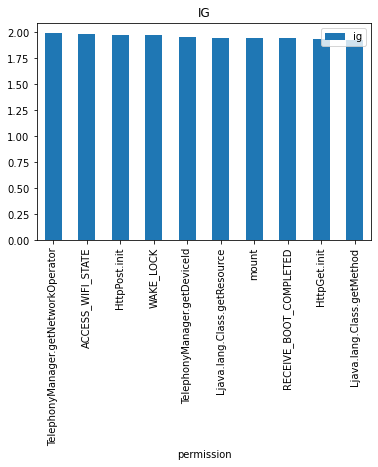

In [23]:
def show_ig_graph():
    ig_df.sort_values(by="ig", ascending=False, inplace=True)
    ig_df.head(10).plot(x="permission", y="ig", kind="bar")
    plt.title("IG")
    plt.show()

show_ig_graph()